**To-Do**
Draw image of each digit
get the distinct keys from dataset 
get the index positions in train data 
using g = plt.imshow(X_train[0][:,:,0]) - draw the diagram 

In [ ]:
def get_digits_data(data):
    test = data.drop_duplicates('label')
    return test

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd

train_data = pd.read_csv('gdrive/My Drive/HW_1/train.csv')
test_data = pd.read_csv('gdrive/My Drive//HW_1/test.csv')

Y_train = train_data["label"]
X_train = train_data.drop("label", axis=1)

#print(test_data)
#Y_test = test_data["label"]
#X_test = test_data.drop("label", axis=1)

In [1]:
#data_all_digits = get_digits_data(train_data)
train_data.shape

NameError: name 'train_data' is not defined

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

j = 1
def print_image(x_val):
    x_val = np.array(x_val)
    reshaped_mat = x_val.reshape((28,28))
    global j
    plt.subplot(2,5, j)
    j = j + 1
    g = plt.imshow(reshaped_mat, cmap = 'gray')
    return

In [ ]:
data_all_digits = data_all_digits.drop("label", axis=1)

0     None
1     None
3     None
6     None
7     None
8     None
10    None
11    None
16    None
21    None
dtype: object

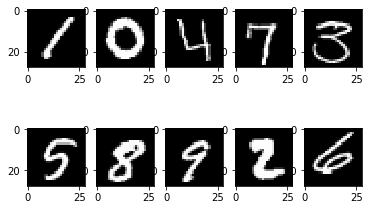

In [29]:
data_all_digits.apply(print_image, axis =1)

Measure the distribution over the labels in the training data. (Hint: This is often called
the prior probability of the classes). Report whether each label is uniformly distributed
across the training examples.

In [ ]:
distribution = Y_train.value_counts(normalize=True)


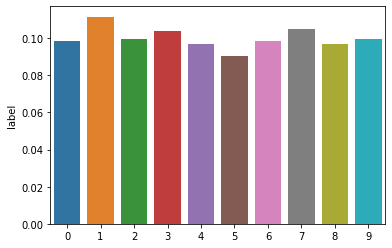

In [31]:
import seaborn
seaborn.barplot(x=distribution.index, y=distribution)

Distribution is uniform over all the labels.

Implement a multiclass classification via logistic regression and try to vary the parameters
so that you can achieve the best performance on our Kaggle dataset. (Hint: Feel free to
refer to the code,2 but note that you should use the dataset downloaded from Kaggle!)

In [32]:
# Standarize the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

dual - false , tol - Tolerance for stopping criteria. , C = Inverse of regularization strength; must be a positive float , solver - SAGA (https://arxiv.org/abs/1407.0202)   , class_weight=’balanced’

In [33]:
random_seed = 3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    X_train, Y_train, test_size=1/7.0, random_state=122)

train_samples = train_img.shape[0]

model_1 = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1, class_weight='balanced')

model_1.fit(train_img, train_lbl)

LogisticRegression(C=0.001388888888888889, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
sparsity = np.mean(model_1.coef_ == 0) * 100
score = model_1.score(test_img, test_lbl)

In [35]:
print(sparsity)
print(score)

model_1.coef_.shape

80.82908163265307
0.8416666666666667


(10, 784)

In [36]:
from sklearn import metrics

y_pred = model_1.predict(test_img)
count_misclassified = (test_lbl != y_pred).sum()

print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 950
Accuracy: 0.84


Neural Network with different parameteres 
-Convert the multiclass labels to one hot encoded to treat every class as different output
-then divide the train and test data 

In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
random_seed = 2

X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

Starting the neural network with 2 layers 
Takes 784 input and map to 100 nodes in first hidden layer with relu and in second layer maps to 25 and outputs 10 classes
784 -> 100 -> 25 -> 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

class NN_MODEL:
        
    def __init__(self, hidden_layers_nodes_input = 0 , output_nodes_input = 0, input_dim_size_input = 0):
        self.hidden_layers_nodes = hidden_layers_nodes_input
        self.output_layer_nodes = output_nodes_input
        self.input_dim_size = input_dim_size_input
    
    def nnn_model(self):
        model = Sequential()
        num_layers = len(self.hidden_layers_nodes)
 
        for i in range(num_layers):
            num_nodes = self.hidden_layers_nodes[i]
            if i == 1:
                model.add(Dense(num_nodes, input_dim=self.input_dim_size, activation='relu'))
            else:
                model.add(Dense(self.hidden_layers_nodes[i], activation='relu'))

        #output layer - softmax to ensure output is in range 0-1
        model.add(Dense(self.output_layer_nodes, activation='softmax'))
    
        # compile model and return 
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    
    def print_test(self):
        print(self.hidden_layers_nodes)
        print(self.output_layer_nodes)
        print(self.input_dim_size)

In [ ]:
# One Layer With 100 nodes 
input_dim_size_input = X_train_nn.shape[1]
hidden_layers_nodes_input = [100]
output_nodes_input = 10

nn_model = NN_MODEL(hidden_layers_nodes_input, output_nodes_input , input_dim_size_input)

In [41]:
estimator = KerasClassifier(build_fn=nn_model.nnn_model, epochs=2, batch_size=5, verbose=0)


kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train_nn,Y_train_nn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 95.04% (0.75%)


In [ ]:
# Grid search common neural net parameters like learning rate, dropout rate, epochs and number of neurons
# Tuning batch size and number of epochs 

from sklearn.model_selection import GridSearchCV

def run_grid_cv(param_grid):
    
    grid=GridSearchCV(estimator=estimator,param_grid=param_grid,n_jobs=-1)
    grid_result=grid.fit(X_train_nn,Y_train_nn)

    # summarize results
    print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))
    means=grid_result.cv_results_['mean_test_score']
    stds=grid_result.cv_results_['std_test_score']
    params=grid_result.cv_results_['params']
    
    for mean,stdev,param in zip(means,stds,params):
         print("%f (%f) with: %r"%(mean,stdev,param))

In [ ]:
batch_size=[10,20,40]
epochs=[10,50]

param_grid= dict(batch_size=batch_size,epochs=epochs)


In [44]:
run_grid_cv(param_grid)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.965344 using {'batch_size': 40, 'epochs': 50}
0.959735 (0.005562) with: {'batch_size': 10, 'epochs': 10}
0.962037 (0.001935) with: {'batch_size': 10, 'epochs': 50}
0.962593 (0.001914) with: {'batch_size': 20, 'epochs': 10}
0.964974 (0.002422) with: {'batch_size': 20, 'epochs': 50}
0.962963 (0.002659) with: {'batch_size': 40, 'epochs': 10}
0.965344 (0.001692) with: {'batch_size': 40, 'epochs': 50}


In [46]:
# create model with 2 hidden layers of  size 100 and 25 

input_dim_size_input_1 = X_train_nn.shape[1]
hidden_layers_nodes_input_1 = [100, 25]
output_nodes_input_1 = 10

nn_model_1 = NN_MODEL(hidden_layers_nodes_input_1, output_nodes_input_1 , input_dim_size_input_1)

estimator_1 = KerasClassifier(build_fn=nn_model_1.nnn_model, epochs=2, batch_size=5, verbose=1)


kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator_1, X_train_nn,Y_train_nn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/2
34020/34020 [==============================] - 21s 619us/step - loss: 0.2819 - acc: 0.9198
Epoch 2/2
3780/3780 [==============================] - 1s 366us/step
Epoch 1/2
34020/34020 [==============================] - 22s 632us/step - loss: 0.2848 - acc: 0.9166
Epoch 2/2
3780/3780 [==============================] - 1s 373us/step
Epoch 1/2
34020/34020 [==============================] - 21s 619us/step - loss: 0.2739 - acc: 0.9208
Epoch 2/2
3780/3780 [==============================] - 1s 384us/step
Epoch 1/2
34020/34020 [==============================] - 21s 611us/step - loss: 0.2845 - acc: 0.9165
Epoch 2/2
3780/3780 [==============================] - 1s 393us/step
Epoch 1/2
34020/34020 [==============================] - 22s 643us/step - loss: 0.2841 - acc: 0.9187
Epoch 2/2
3780/3780 [==============================] - 2s 399us/step
Epoch 1/2
34020/34020 [==============================] - 22s 641us/step - loss: 0.2896 - acc: 0.9170
Epoch 2/2
3780/3780 [============================